In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pyhdf.SD import SD, SDC

In [3]:
file_name = '/neodc/modis/data/MOD06_L2/collection61/2024/01/01/MOD06_L2.A2024001.0000.061.2024004163458.hdf'
hdf = SD(file_name, SDC.READ)

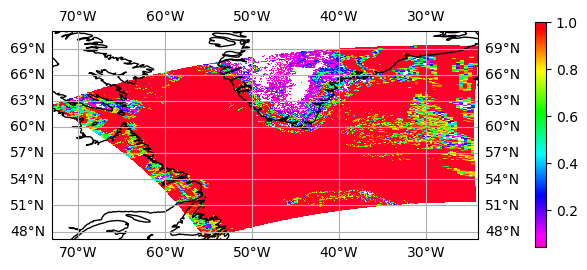

In [4]:
lat = hdf.select('Latitude')[:]
lon = hdf.select('Longitude')[:]
cf = hdf.select('Cloud_Fraction')[:] / 100
cf[cf == 0] = np.nan
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()])
fill = ax.pcolormesh(lon, lat, cf, cmap='gist_rainbow_r')
plt.colorbar(fill, cmap='gist_rainbow_r', shrink=0.5, pad=0.1)
plt.tight_layout()
plt.show()